In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas

In [ ]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [ ]:
dataset = get_dataset("m4_hourly")

In [ ]:
dataset.metadata.freq

'H'

In [ ]:
dataset.metadata.freq = 'h'

/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/gluonts/dataset/common.py:263: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.Period(val, freq)


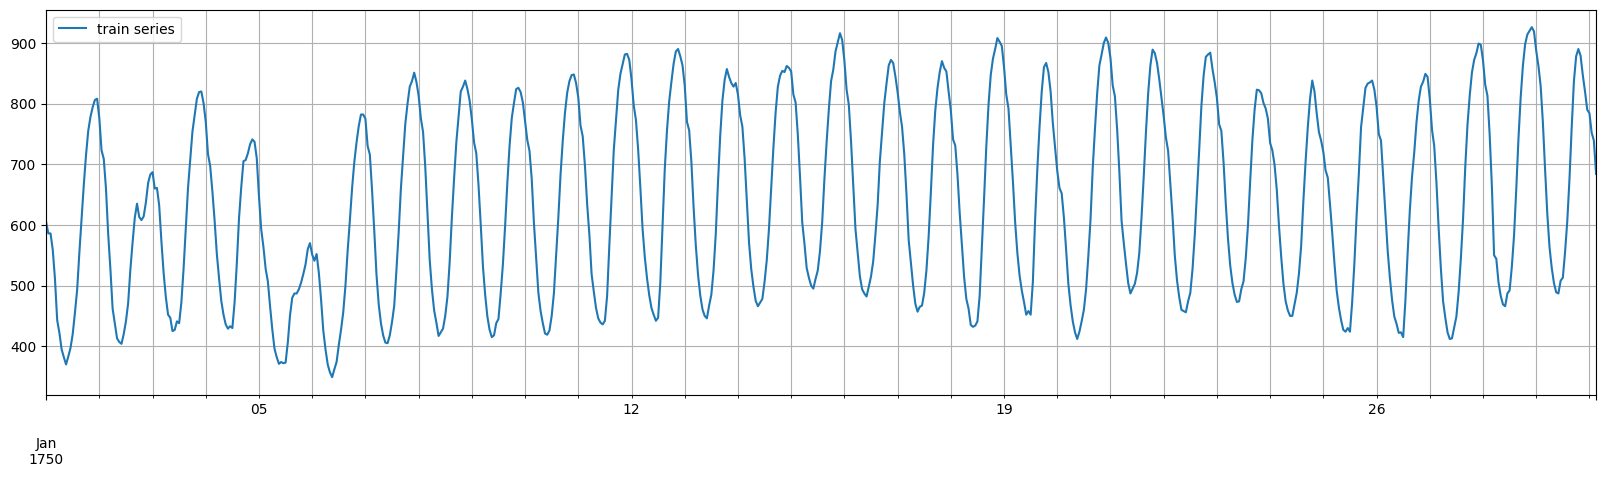

In [ ]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot(figsize=(20, 5))
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

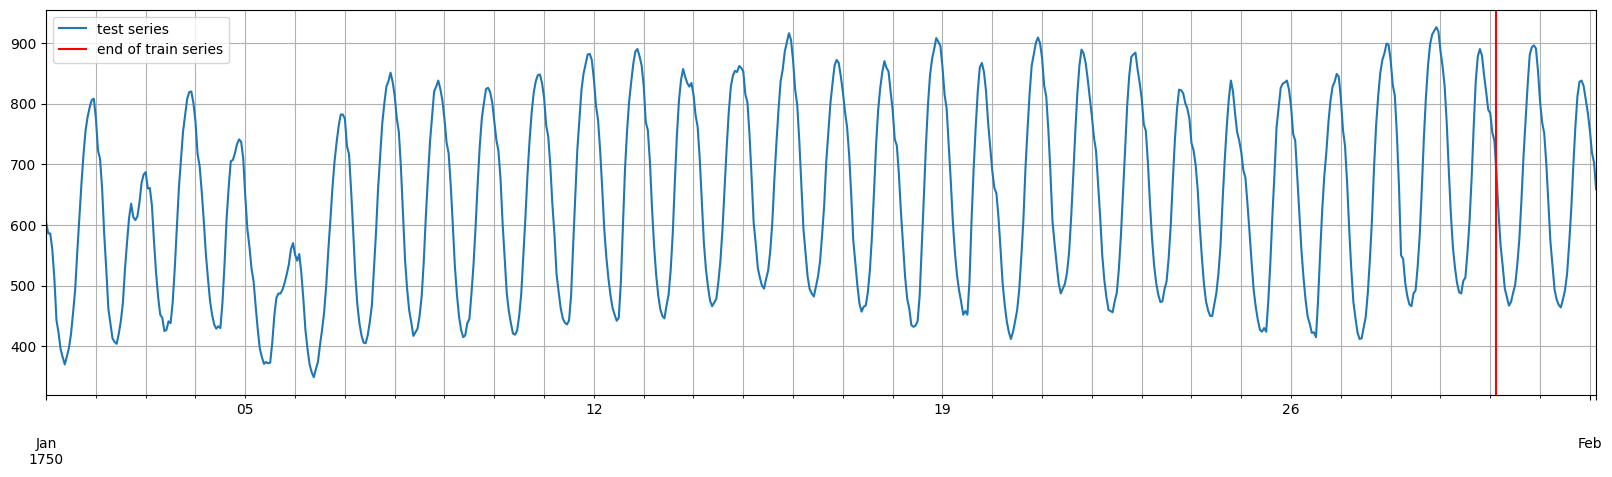

In [ ]:
entry = next(iter(dataset.test))
test_series = to_pandas(entry)
test_series.plot(figsize=(20, 5))
plt.axvline(train_series.index[-1], color="r")  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()

In [ ]:
print(f"Length of training dataset: {len(train_series)}")
print(f"Length of test dataset: {len(test_series)}")
print(f"Length of forecasting window in test dataset: {len(test_series) - len(train_series)}")
print(f"Recommended prediction horizon: {dataset.metadata.prediction_length}")
print(f"Frequency of the time series: {dataset.metadata.freq}")

Length of training dataset: 700
Length of test dataset: 748
Length of forecasting window in test dataset: 48
Recommended prediction horizon: 48
Frequency of the time series: h


## Training an existing model (Estimator)

In [ ]:
from gluonts.torch import SimpleFeedForwardEstimator

In [ ]:
estimator = SimpleFeedForwardEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=100,

    hidden_dimensions=[10],
    lr=1e-3,
    num_batches_per_epoch=100,
    trainer_kwargs=dict(
        max_epochs=5
    )
)

In [ ]:
predictor = estimator.train(dataset.train)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/home/usr/miniconda3/envs/cal/lib/python3.12/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are usi

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 100: 'train_loss' reached 5.46552 (best 5.46552), saving model to '/home/usr/wsl-ws/notebooks/Timeseries/glutonts/basic/lightning_logs/version_1/checkpoints/epoch=0-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 100: 'train_loss' reached 5.46552 (best 5.46552), saving model to '/home/usr/wsl-ws/notebooks/Timeseries/glutonts/basic/lightning_logs/version_1/checkpoints/epoch=0-step=100.ckpt' as top 1
INFO: Epoch 1, global step 200: 'train_loss' reached 4.81870 (best 4.81870), saving model to '/home/usr/wsl-ws/notebooks/Timeseries/glutonts/basic/lightning_logs/version_1/checkpoints/epoch=1-step=200.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 200: 'train_loss' reached 4.81870 (best 4.81870), saving model to '/home/usr/wsl-ws/notebooks/Timeseries/glutonts/basic/lightning_logs/version_1/checkpoints/epoch=1-step=200.ckpt' as top 1
INFO: Epoch 2, global step 300: 'train_loss' reached 4.68177 (

## Visualize and evaluate forecasts

In [ ]:
from gluonts.evaluation import make_evaluation_predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=predictor,  # predictor
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

- tss

In [ ]:
# first entry of the time series list
ts_entry = tss[0]

In [ ]:
np.array(ts_entry).shape

(748, 1)

In [ ]:
# first 5 values of the time series (convert from pandas to numpy)
np.array(ts_entry[:5]).reshape(-1,)

array([605., 586., 586., 559., 511.], dtype=float32)

In [ ]:
# first entry of dataset.test
dataset_test_entry = next(iter(dataset.test))

In [ ]:
dataset_test_entry["target"].shape

(748,)

In [ ]:
# first 5 values
dataset_test_entry["target"][:5]

array([605., 586., 586., 559., 511.], dtype=float32)

- forecasts

In [ ]:
forecasts = [f.to_sample_forecast(num_samples=100) for f in forecasts]

In [ ]:
# first entry of the forecast list
forecast_entry = forecasts[0]

In [ ]:
print(f"Number of sample paths: {forecast_entry.num_samples}")
print(f"Dimension of samples: {forecast_entry.samples.shape}")
print(f"Start date of the forecast window: {forecast_entry.start_date}")
print(f"Frequency of the time series: {forecast_entry.freq}")

Number of sample paths: 100
Dimension of samples: (100, 48)
Start date of the forecast window: 1750-01-30 04:00
Frequency of the time series: <Hour>


In [ ]:
print(f"Mean of the future window:\n {forecast_entry.mean}")
print(f"0.5-quantile (median) of the future window:\n {forecast_entry.quantile(0.5)}")

Mean of the future window:
 [632.4628  587.5812  549.20544 528.58276 474.1299  455.55673 487.94388
 513.5834  520.53174 529.78735 615.6978  701.8192  759.06384 769.8848
 839.19086 792.8041  865.31726 878.75275 842.6573  822.8505  793.38055
 766.1188  747.7957  719.6194  678.3898  611.69855 566.1891  529.3069
 533.46564 488.10086 485.4385  541.27594 502.7963  520.1911  632.77985
 676.07733 733.8974  805.75616 815.9327  888.0249  895.02563 923.31213
 811.3418  789.3269  809.2274  794.9043  758.3022  729.5282 ]
0.5-quantile (median) of the future window:
 [631.7362  584.4865  537.4765  527.9355  477.15012 447.12836 487.26038
 503.9608  526.0304  545.13885 611.9921  696.4249  728.6064  774.40625
 826.9322  798.4429  861.272   873.5448  841.6479  831.90894 775.93445
 770.8396  776.37775 719.06134 681.81055 589.61273 549.9872  525.74817
 529.8893  491.99658 489.01678 519.12366 497.6431  522.5039  611.4524
 678.9856  730.9244  802.93567 804.8404  887.55475 899.44104 899.8002
 836.07214 819.36

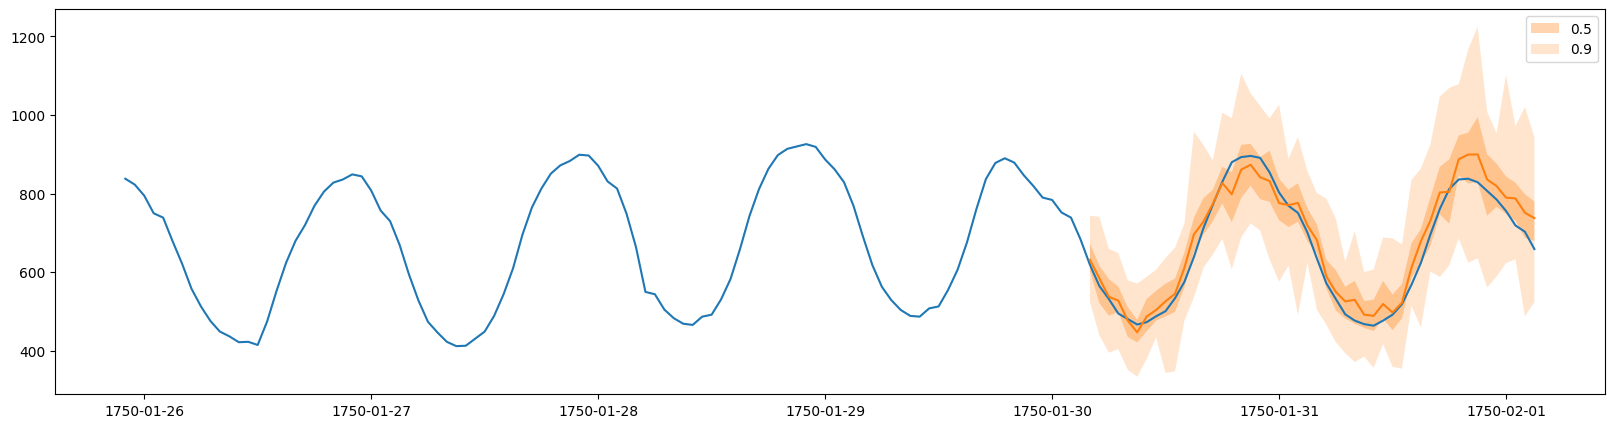

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(ts_entry[-150:].to_timestamp())
forecast_entry.plot(show_label=True)
plt.legend()
plt.show()

In [ ]:
from gluonts.evaluation import Evaluator

In [ ]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(tss, forecasts)

Running evaluation: 414it [00:00, 9706.65it/s]


In [ ]:
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 6385959.075976047,
    "abs_error": 7726862.3789691925,
    "abs_target_sum": 145558863.59960938,
    "abs_target_mean": 7324.822041043146,
    "seasonal_error": 336.9046924038305,
    "MASE": 2.716770302648328,
    "MAPE": 0.19994700845816862,
    "sMAPE": 0.16718174876486236,
    "MSIS": 60.28229276827514,
    "num_masked_target_values": 0.0,
    "QuantileLoss[0.1]": 4613603.408516885,
    "Coverage[0.1]": 0.09576288244766507,
    "QuantileLoss[0.5]": 7726862.334943771,
    "Coverage[0.5]": 0.45063405797101447,
    "QuantileLoss[0.9]": 6096047.540692709,
    "Coverage[0.9]": 0.8688103864734299,
    "RMSE": 2527.0455231309243,
    "NRMSE": 0.34499753154017126,
    "ND": 0.05308410761039995,
    "wQuantileLoss[0.1]": 0.03169579161601304,
    "wQuantileLoss[0.5]": 0.0530841073079421,
    "wQuantileLoss[0.9]": 0.04188029083176401,
    "mean_absolute_QuantileLoss": 6145504.4280511215,
    "mean_wQuantileLoss": 0.04222006325190639,
    "MAE_Coverage": 0.38960346215781,
    "OW

In [ ]:
item_metrics

,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,num_masked_target_values,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,1750-01-30 04:00,1665.766276,1483.559937,31644.0,659.250000,42.371302,0.729444,0.047163,0.046025,0.0,0.046883,12.319296,875.864716,0.000000,1483.559906,0.791667,1314.410291,1.000000
1,1,1750-01-30 04:00,134120.250000,16587.195312,124149.0,2586.437500,165.107988,2.092973,0.143242,0.131724,0.0,0.133607,13.707437,3480.395410,0.250000,16587.195190,1.000000,7710.551172,1.000000
2,2,1750-01-30 04:00,40468.666667,7300.911621,65030.0,1354.791667,78.889053,1.928054,0.098440,0.106003,0.0,0.112270,13.882858,3461.093323,0.000000,7300.911987,0.104167,3051.101294,0.729167
3,3,1750-01-30 04:00,267191.937500,17495.998047,235783.0,4912.145833,258.982249,1.407432,0.071756,0.071895,0.0,0.074204,14.293032,9864.983643,0.041667,17495.999023,0.416667,6881.703027,0.979167
4,4,1750-01-30 04:00,70900.859375,7894.435547,131088.0,2731.000000,200.494083,0.820311,0.058727,0.056283,0.0,0.060222,13.531040,4116.093042,0.000000,7894.435913,0.729167,5955.374805,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,409,1750-02-10 00:00,1699.773600,1557.418457,5665.0,118.020833,24.726496,1.312204,0.323553,0.322736,0.0,0.274919,17.982299,720.537218,0.125000,1557.418402,0.333333,1448.544805,0.583333
410,410,1750-02-10 00:00,1054.694499,1081.093262,4968.0,103.500000,20.766026,1.084597,0.286910,0.234030,0.0,0.217611,10.105404,776.690875,0.250000,1081.093229,0.458333,548.293127,0.812500
411,411,1750-02-10 00:00,1285.849365,1011.780029,3232.0,67.333333,17.477564,1.206046,0.359827,0.280003,0.0,0.313051,14.837383,928.844490,0.354167,1011.779987,0.666667,361.321989,0.895833
412,412,1750-02-10 00:00,244.298442,509.829407,2077.0,43.270833,8.636752,1.229796,0.271027,0.248957,0.0,0.245464,10.316323,190.249618,0.250000,509.829409,0.604167,370.268290,0.812500


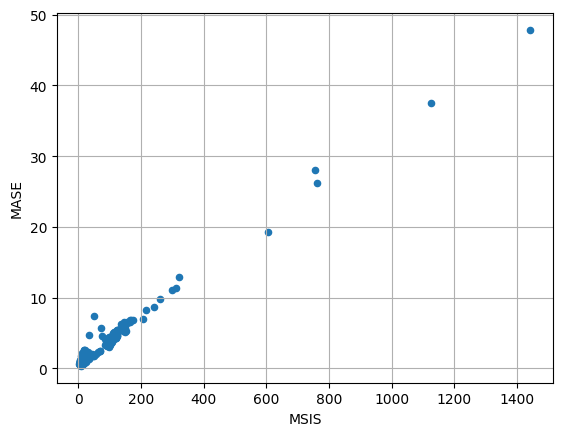

In [ ]:
item_metrics.plot(x="MSIS", y="MASE", kind="scatter")
plt.grid(which="both")
plt.show()